In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [2]:
df.rename(columns={'Genre':'Gender', 'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'}, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

well we are required both column Gender and Age but we are dropping here because we want to plot scatter plot

In [5]:
df.drop(columns=['CustomerID', 'Gender', 'Age'], inplace=True)

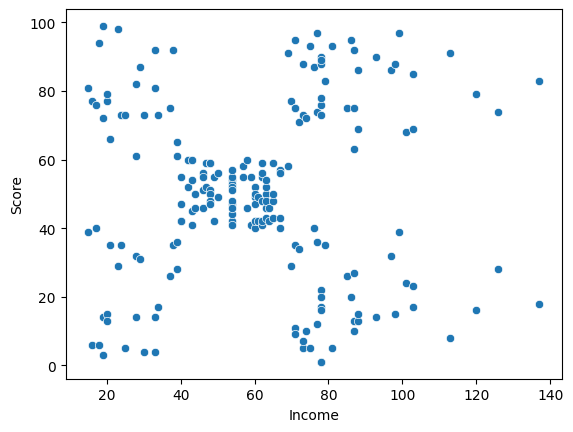

In [6]:
sns.scatterplot(x='Income', y='Score', data=df)
plt.show()

#### for supervised machine learning, there is no output variable

In [7]:
X = df[['Income', 'Score']]

# 1. KMeans  Clustering
#### find the optimal number of clusters : Elbow Curve

[269981.28, 181363.595959596, 106348.37306211119, 73679.78903948837, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.83934915659, 21862.092672182887, 19672.07284901432]


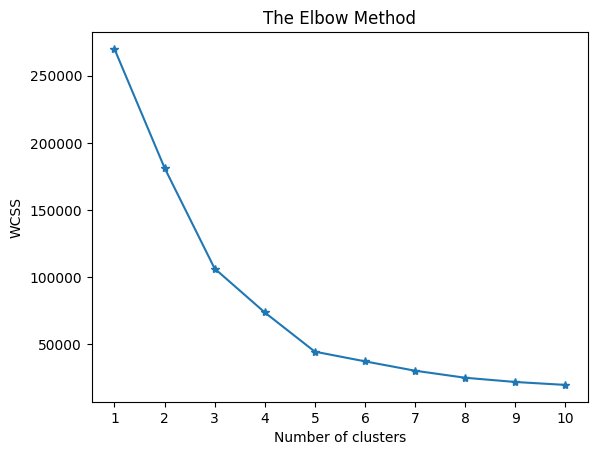

In [8]:
wcss = []
for k in range(1, 11):
    Kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    Kmeans_model.fit(X)
    wcss.append(Kmeans_model.inertia_)
    # .inertia_ = wcss value
print(wcss)

# using the elbow method
plt.plot(range(1, 11), wcss, marker="*")
plt.xticks(range(1, 11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

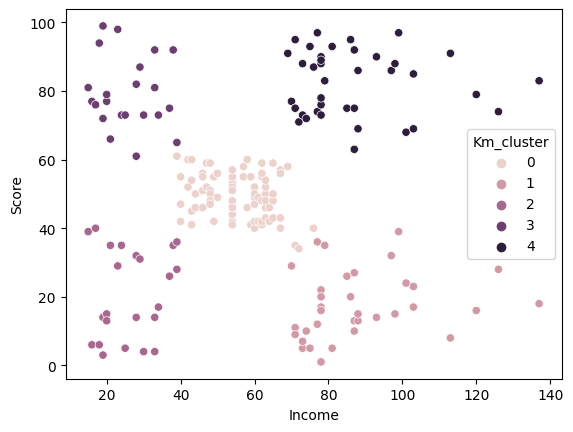

In [9]:
from sklearn.cluster import KMeans
Kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_lables = Kmeans_model.fit_predict(X)
# fit & predict
df['Km_cluster'] = cluster_lables
sns.scatterplot(x='Income', y='Score', hue='Km_cluster', data=df)
plt.show()

# 2. Hierarchical Clustering
#### Identifying the optimal number of clusters using Dendogram

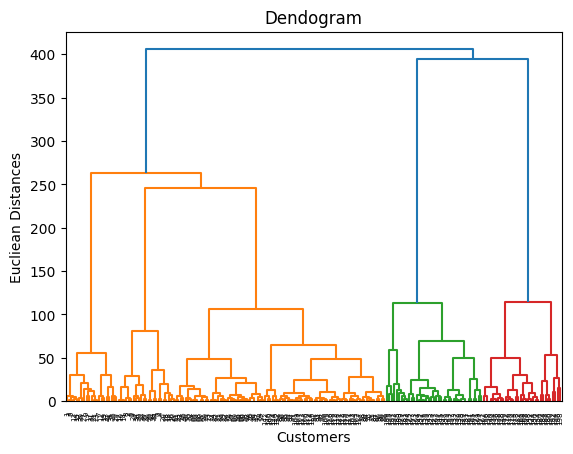

In [14]:
import scipy.cluster.hierarchy as sch
data = sch.linkage(X, method='ward')
# ward = centroid
dendogram = sch.dendrogram(data)
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Eucliean Distances')
plt.show()

#### Hierarchical Clustering Model

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# fit & predict
X['h_cluster'] = hc.fit_predict(X)
X

Income  Score  h_cluster
0        15     39          4
1        15     81          3
2        16      6          4
3        16     77          3
4        17     40          4
..      ...    ...        ...
195     120     79          2
196     126     28          0
197     126     74          2
198     137     18          0
199     137     83          2

[200 rows x 3 columns]

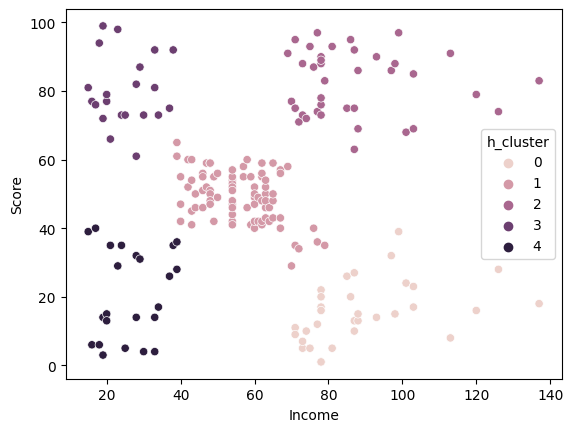

In [25]:
sns.scatterplot(x='Income', y='Score', hue='h_cluster', data=X)
plt.show()

# 3. DBSCAN Clustering

In [68]:
for r in range(1, 10):
    for m in range(3, 10):
        from sklearn.cluster import DBSCAN
        dbs = DBSCAN(eps=r, min_samples=m)
        X['db_cluster'] = dbs.fit_predict(X)
        
    if X['db_cluster'].nunique() == 1:
        break
    
print('eps:', r)
print('min:', m)

eps: 1
min: 9


In [28]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=8, min_samples=9)
X['db_cluster'] = dbs.fit_predict(X)

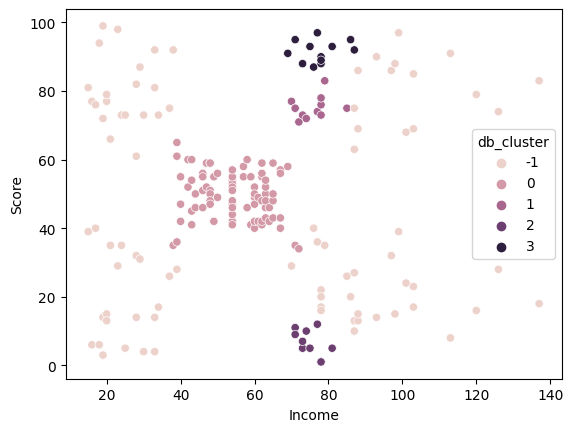

In [34]:
sns.scatterplot(x='Income', y='Score', data=X, hue='db_cluster')
plt.show()